In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pylab as pl
import seaborn as sn
%matplotlib inline

In [ ]:
train_data=pd.read_csv('/content/train.csv')
test_data=pd.read_csv('/content/test.csv')


In [ ]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train_data.shape

(1460, 81)

In [ ]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
test_data.shape

(1459, 80)

In [ ]:
#seperating x train and y train
x_train=train_data.iloc[:,:-1]
x_train=x_train.drop(labels='Id',axis=1)

In [ ]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [ ]:
y_train=train_data.iloc[:,-1]

In [ ]:
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

##preprocessing y_train

In [ ]:
y_train.isnull().sum()

0

##preprocessing x_train

In [ ]:
x_train.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Length: 79, dtype: int64

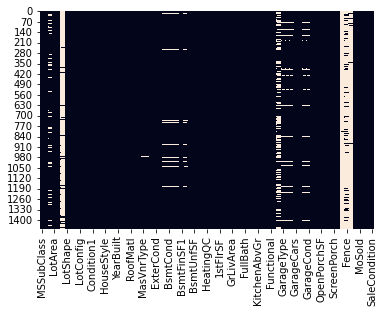

In [ ]:
sn.heatmap(x_train.isnull(), cbar=False)


In [ ]:
rows=len(x_train)
for columns in x_train.columns:
  null_count=x_train[columns].isnull().sum()
  null_count=null_count*100/rows
  if (null_count>25):
    x_train=x_train.drop(labels=columns,axis='columns')
    print(f'dropping {columns}:{null_count}')


dropping Alley:93.76712328767124
dropping FireplaceQu:47.26027397260274
dropping PoolQC:99.52054794520548
dropping Fence:80.75342465753425
dropping MiscFeature:96.3013698630137


In [ ]:
numerical=[]
categorial=[]
for columns in x_train.columns:
  if(x_train[columns].dtype!='object'):
    numerical.append(columns)
  else:
    categorial.append(columns)


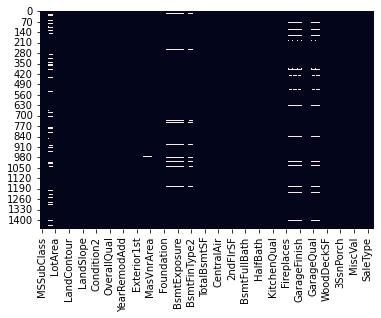

In [ ]:
sn.heatmap(x_train.isnull(), cbar=False)


In [ ]:
numerical

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
categorial

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
for i in categorial:
  x_train[i]=x_train[i].fillna(value=x_train[i].mode()[0])


In [ ]:
def outlier(column):
  q1=np.nanquantile(column,0.25)
  q3=np.nanquantile(column,0.75)
  iqr=q3-q1
  max=q3+1.5*iqr
  min=q1-1.5*iqr
  for i in column:
    if i> max or i<min:
      return True
  return False


In [ ]:
for i in numerical:
  outl=outlier(x_train[i])
  if outl:
    x_train[i]=x_train[i].fillna(value=np.nanmedian(x_train[i]))
  else:
    x_train[i]=x_train[i].fillna(value=np.nanmean(x_train[i]))




In [ ]:
x_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

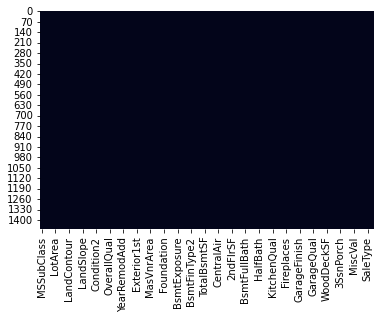

In [ ]:
sn.heatmap(x_train.isnull(), cbar=False)


##preprocessing x_test

In [ ]:
x_train_columns=x_train.columns

for i in test_data:
  if i not in x_train_columns:
    test_data.drop(labels=i,axis=1,inplace=True)

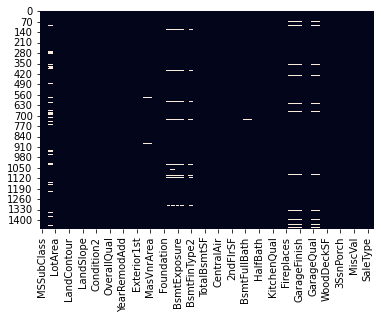

In [ ]:
sn.heatmap(test_data.isnull(), cbar=False)


In [ ]:
for columns in test_data.columns:
  null_count=test_data[columns].isnull().sum()
  null_count=null_count*100/rows
  if (null_count>25):
    test_data=test_data.drop(labels=columns,axis='columns')
    print(f'dropping {columns}:{null_count}')

In [ ]:
test_numerical=[]
test_categorial=[]
for columns in test_data.columns:
  if(test_data[columns].dtype!='object'):
    test_numerical.append(columns)
  else:
    test_categorial.append(columns)

In [ ]:
test_numerical

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
test_categorial

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [ ]:
for i in categorial:
  test_data[i]=test_data[i].fillna(value=test_data[i].mode()[0])


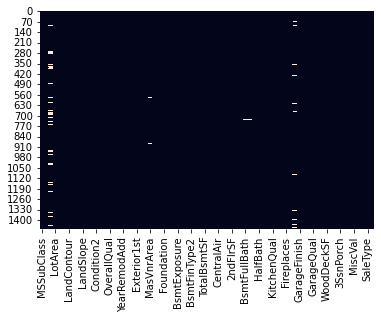

In [ ]:
sn.heatmap(test_data.isnull(), cbar=False)


In [ ]:
for i in numerical:
  outl=outlier(test_data[i])
  if outl:
    test_data[i]=test_data[i].fillna(value=np.nanmedian(test_data[i]))
  else:
    test_data[i]=test_data[i].fillna(value=np.nanmean(test_data[i]))




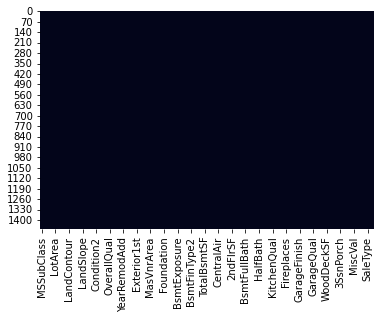

In [ ]:
sn.heatmap(test_data.isnull(), cbar=False)


In [ ]:
#to check whether train and test columns are matching
for i in test_data:
  if(i not in x_train_columns):
    print('mismatch')

In [ ]:
x_train.shape

(1460, 74)

In [ ]:
test_data.shape

(1459, 74)

##univariate analysis

In [ ]:
x_train['MSSubClass'].describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

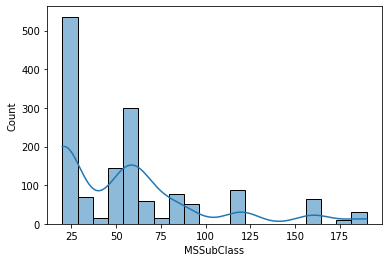

In [ ]:
sn.histplot(x_train['MSSubClass'],kde=True)

In [ ]:
x_train['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


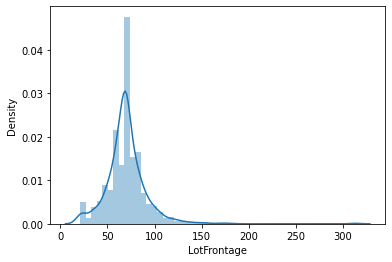

In [ ]:
sn.distplot(x_train['LotFrontage'],kde=True)

In [ ]:
x_train['LotArea'].describe()  

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


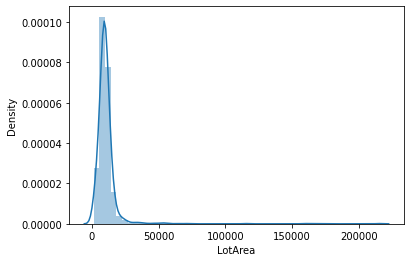

In [ ]:
sn.distplot(x_train['LotArea'],kde=True)

In [ ]:
x_train['MasVnrArea'].describe()  

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


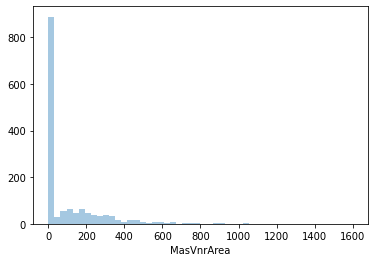

In [ ]:
sn.distplot(x_train['MasVnrArea'],kde=False)

In [ ]:
x_train['BsmtFinSF1'].describe()  

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


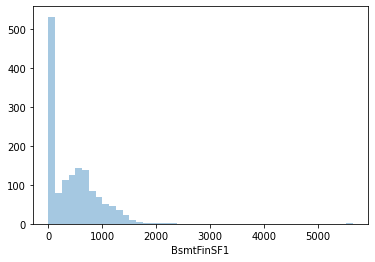

In [ ]:
sn.distplot(x_train['BsmtFinSF1'],kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


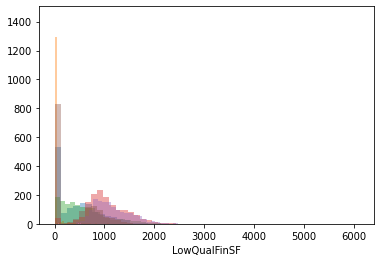

In [ ]:

for i in ['BsmtFinSF1',"BsmtFinSF2",'BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF']:
  sn.distplot(x_train[i],kde=False)


##Multivariate

In [ ]:
train=pd.concat((x_train,y_train),axis=1)
# pl.figure(figsize=(100,100))
train.iloc[ : , : ].corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [ ]:
#removing the least correlated features 
dropoff=[]
for i in numerical:
  corr,_=np.corrcoef(y_train,x_train[i])
  if abs(corr[1])<0.2:
    print(corr[1])
    dropoff.append(i)
print(dropoff)



-0.08428413512659531
-0.07785589404867803
-0.011378121450215127
-0.025606130000679593
-0.016844154297359016
0.16821315430073985
-0.13590737084214122
-0.12857795792595653
0.04458366533574846
0.11144657114291107
0.09240354949187321
-0.021189579640303255
0.04643224522381938
-0.028922585168730374
['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
#checking for dependancy between ind variables
for i in numerical:
  for j in numerical:
    ind_corr,_=np.corrcoef(y_train,x_train[i])
    if ind_corr[1]>0.9:
      print(j)

In [ ]:
x_train.drop(labels=dropoff,axis=1,inplace=True)
test_data.drop(labels=dropoff,axis=1,inplace=True)

In [ ]:
x_train.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,2,548,TA,TA,Y,0,61,WD,Normal
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,2,460,TA,TA,Y,298,0,WD,Normal
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,2,608,TA,TA,Y,0,42,WD,Normal
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,3,642,TA,TA,Y,0,35,WD,Abnorml
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,3,836,TA,TA,Y,192,84,WD,Normal


In [ ]:
test_data

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Unf,1.0,730.0,TA,TA,Y,140,0,WD,Normal
1,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,Unf,1.0,312.0,TA,TA,Y,393,36,WD,Normal
2,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Fin,2.0,482.0,TA,TA,Y,212,34,WD,Normal
3,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,Fin,2.0,470.0,TA,TA,Y,360,36,WD,Normal
4,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,RFn,2.0,506.0,TA,TA,Y,0,82,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,Unf,0.0,0.0,TA,TA,Y,0,0,WD,Normal
1455,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,Unf,1.0,286.0,TA,TA,Y,0,24,WD,Abnorml
1456,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,Unf,2.0,576.0,TA,TA,Y,474,0,WD,Abnorml
1457,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,Unf,0.0,0.0,TA,TA,Y,80,32,WD,Normal


##one hot encoding

In [ ]:
new_data=pd.concat((x_train,test_data),axis=0)

In [ ]:
new_data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,2.0,548.0,TA,TA,Y,0,61,WD,Normal
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,RFn,2.0,460.0,TA,TA,Y,298,0,WD,Normal
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,RFn,2.0,608.0,TA,TA,Y,0,42,WD,Normal
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Unf,3.0,642.0,TA,TA,Y,0,35,WD,Abnorml
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,RFn,3.0,836.0,TA,TA,Y,192,84,WD,Normal


In [ ]:
new_data.info

<bound method DataFrame.info of      MSZoning  LotFrontage  LotArea Street LotShape LandContour Utilities  \
0          RL         65.0     8450   Pave      Reg         Lvl    AllPub   
1          RL         80.0     9600   Pave      Reg         Lvl    AllPub   
2          RL         68.0    11250   Pave      IR1         Lvl    AllPub   
3          RL         60.0     9550   Pave      IR1         Lvl    AllPub   
4          RL         84.0    14260   Pave      IR1         Lvl    AllPub   
...       ...          ...      ...    ...      ...         ...       ...   
1454       RM         21.0     1936   Pave      Reg         Lvl    AllPub   
1455       RM         21.0     1894   Pave      Reg         Lvl    AllPub   
1456       RL        160.0    20000   Pave      Reg         Lvl    AllPub   
1457       RL         62.0    10441   Pave      Reg         Lvl    AllPub   
1458       RL         74.0     9627   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... 

In [ ]:
def one_hot_encoding(columns):
  one_hot=pd.get_dummies(columns)
  return one_hot.iloc[:,:-1]




In [ ]:
for i in categorial:
  dummy=one_hot_encoding(new_data[i])
  new_data=pd.concat((new_data,dummy),axis=1)


In [ ]:
new_data.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,ConLD,ConLI,ConLw,New,Oth,Abnorml,AdjLand,Alloca,Family,Normal
0,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,0,0,0,0,1
1,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,0,0,0,0,1
2,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,0,0,0,0,1
3,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,0,0,0,0,0,1,0,0,0,0
4,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
new_data.drop(columns=categorial,inplace=True)

In [ ]:
new_data=new_data.loc[:,~new_data.columns.duplicated()]

In [ ]:
new_data.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,ConLD,ConLI,ConLw,New,Oth,Abnorml,AdjLand,Alloca,Family,Normal
0,65.0,8450,7,2003,2003,196.0,706.0,150.0,856.0,856,...,0,0,0,0,0,0,0,0,0,1
1,80.0,9600,6,1976,1976,0.0,978.0,284.0,1262.0,1262,...,0,0,0,0,0,0,0,0,0,1
2,68.0,11250,7,2001,2002,162.0,486.0,434.0,920.0,920,...,0,0,0,0,0,0,0,0,0,1
3,60.0,9550,7,1915,1970,0.0,216.0,540.0,756.0,961,...,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,8,2000,2000,350.0,655.0,490.0,1145.0,1145,...,0,0,0,0,0,0,0,0,0,1


##feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
new_data.iloc[ : , : 60]=StandardScaler().fit_transform(new_data.iloc[ : , :60])
new_data.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,ConLD,ConLI,ConLw,New,Oth,Abnorml,AdjLand,Alloca,Family,Normal
0,-0.192299,-0.217879,0.646183,1.046258,0.896833,0.529034,0.580971,-0.934776,-0.444277,-0.773861,...,0,0,0,0,0,0,0,0,0,1
1,0.511345,-0.072044,-0.063185,0.154764,-0.395604,-0.567016,1.178173,-0.629812,0.477159,0.261075,...,0,0,0,0,0,0,0,0,0,1
2,-0.051570,0.137197,0.646183,0.980221,0.848965,0.338903,0.097941,-0.288435,-0.299026,-0.610718,...,0,0,0,0,0,0,0,0,0,1
3,-0.426847,-0.078385,0.646183,-1.859351,-0.682812,-0.567016,-0.494869,-0.047196,-0.671231,-0.506205,...,0,0,0,0,0,1,0,0,0,0
4,0.698984,0.518903,1.355551,0.947203,0.753229,1.390216,0.468996,-0.160988,0.211622,-0.037170,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_train_2=new_data.iloc[:1460,:]
x_test_2=new_data.iloc[1460:,:]

In [ ]:
x_train_2

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,ConLD,ConLI,ConLw,New,Oth,Abnorml,AdjLand,Alloca,Family,Normal
0,-0.192299,-0.217879,0.646183,1.046258,0.896833,0.529034,0.580971,-0.934776,-0.444277,-0.773861,...,0,0,0,0,0,0,0,0,0,1
1,0.511345,-0.072044,-0.063185,0.154764,-0.395604,-0.567016,1.178173,-0.629812,0.477159,0.261075,...,0,0,0,0,0,0,0,0,0,1
2,-0.051570,0.137197,0.646183,0.980221,0.848965,0.338903,0.097941,-0.288435,-0.299026,-0.610718,...,0,0,0,0,0,0,0,0,0,1
3,-0.426847,-0.078385,0.646183,-1.859351,-0.682812,-0.567016,-0.494869,-0.047196,-0.671231,-0.506205,...,0,0,0,0,0,1,0,0,0,0
4,0.698984,0.518903,1.355551,0.947203,0.753229,1.390216,0.468996,-0.160988,0.211622,-0.037170,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.333028,-0.285470,-0.063185,0.914184,0.753229,-0.567016,-0.969117,0.892729,-0.224131,-0.526598,...,0,0,0,0,0,0,0,0,0,1
1456,0.745893,0.381311,-0.063185,0.220801,0.178812,0.098443,0.765401,0.064321,1.112632,2.328397,...,0,0,0,0,0,0,0,0,0,1
1457,-0.145389,-0.142806,0.646183,-1.000876,1.040437,-0.567016,-0.365329,0.719765,0.227509,0.072441,...,0,0,0,0,0,0,0,0,0,1
1458,-0.051570,-0.057207,-0.772552,-0.703711,0.561757,-0.567016,-0.861533,-1.276152,0.059563,-0.207960,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_test_2

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,ConLD,ConLI,ConLw,New,Oth,Abnorml,AdjLand,Alloca,Family,Normal
0,0.511345,0.184371,-0.772552,-0.340510,-1.113625,-0.567016,0.058420,-0.661674,-0.385268,-0.671897,...,0,0,0,0,0,0,0,0,0,1
1,0.558255,0.519791,-0.063185,-0.439565,-1.257229,0.036930,1.057415,-0.352159,0.629219,0.431865,...,0,0,0,0,0,0,0,0,0,1
2,0.229888,0.464374,-0.772552,0.848148,0.657493,-0.567016,0.767597,-0.964362,-0.280869,-0.590326,...,0,0,0,0,0,0,0,0,0,1
3,0.417526,-0.024109,-0.063185,0.881166,0.657493,-0.455174,0.352630,-0.538778,-0.285408,-0.595424,...,0,0,0,0,0,0,0,0,0,1
4,-1.224311,-0.654748,1.355551,0.683057,0.370284,-0.567016,-0.391676,1.038383,0.518011,0.306959,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-2.256322,-1.043937,-1.481920,-0.043346,-0.682812,-0.567016,-0.969117,-0.033540,-1.147836,-1.564083,...,0,0,0,0,0,0,0,0,0,1
1455,-2.256322,-1.049263,-1.481920,-0.043346,-0.682812,-0.567016,-0.415828,-0.607054,-1.147836,-1.564083,...,0,0,0,0,0,1,0,0,0,0
1456,4.264115,1.246808,-0.772552,-0.373528,0.561757,-0.567016,1.718288,-1.276152,0.390916,0.164209,...,0,0,0,0,0,1,0,0,0,0
1457,-0.333028,0.034605,-0.772552,0.683057,0.370284,-0.567016,-0.229203,0.032459,-0.317182,-0.483263,...,0,0,0,0,0,0,0,0,0,1


##model

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train_2, y_train)

LinearRegression()

In [ ]:
model1.coef_

array([ 1.69215002e+03,  4.20944875e+03,  1.33273450e+04,  4.52978473e+03,
        5.35949825e+03,  2.68888839e+03,  5.28648477e+03, -5.33170470e+03,
        1.10362882e+04,  2.30821626e+03,  1.08287563e+04,  2.12507781e+04,
        1.09062241e+03,  1.04947242e+02,  6.11169857e+02,  3.30065614e+02,
        3.29819721e+03,  1.46858187e+03,  3.12186619e+03,  2.64728157e+03,
        1.75583825e+03,  1.03767109e+03, -2.85079055e+03,  2.42881834e+01,
       -1.79835994e+02,  1.03944231e+03, -1.26961393e+03, -3.95583193e+02,
        9.05690841e+02,  4.05492320e+02, -1.99077904e+03,  1.38897574e+03,
       -1.65350150e+03,  3.91700915e+02,  1.41630258e+02,  2.43642885e+03,
       -1.00582187e+03, -9.31506799e+02,  3.18861965e+03,  5.09952249e+03,
       -8.65177509e+02, -7.19625367e+02, -1.36960163e+02, -1.78988480e+03,
       -2.71738307e+03, -6.19210170e+03, -3.06702279e+01, -6.89539435e+03,
       -6.66192840e+03, -3.16903977e+03, -1.04348950e+03, -5.66590555e+03,
       -9.46059546e+03,  

In [ ]:
model1.intercept_

270298.9140078996

In [ ]:
y_pred=model1.predict(x_train_2)
y_pred

array([210558.85610371, 185733.33402341, 215433.57217839, ...,
       284933.24834561, 147785.59684486, 157887.17157404])

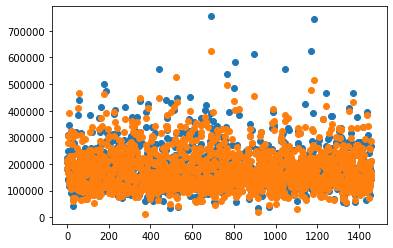

In [ ]:
pl.scatter(x=[i for i in range(1460)],y=y_train)
pl.scatter(x=[i for i in range(1459+1)],y=y_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.9003893148225355

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_train,y_pred))

MSE 628223532.2560562


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_train,y_pred)))

RMSE 25064.38772952685


In [ ]:
import pickle
pickle.dump(model1,open('model.pkl', 'wb'))